### Importing Liraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Importing Dataset

In [27]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

In [28]:
df.shape

(768, 9)

In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
#checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

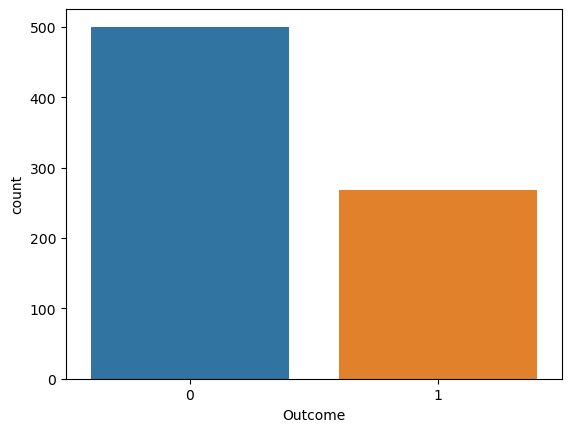

In [32]:
sns.countplot(x="Outcome", data=df)

0 : Non Diabetic

1 : Diabetic

### Model Training

In [33]:
#splitting the dataset into target and features
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

In [34]:
#splitting data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [35]:
#logistic regression
model = LogisticRegression()

model.fit(X_train, Y_train)

C:\Users\KIIT\anaconda3\mlproject\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [36]:
X_pred = model.predict(X_test)
accuracy = accuracy_score(X_pred, Y_test)
print("Accuracy of model", accuracy)

Accuracy of model 0.7748917748917749


In [37]:
cm = confusion_matrix(Y_test,X_pred)


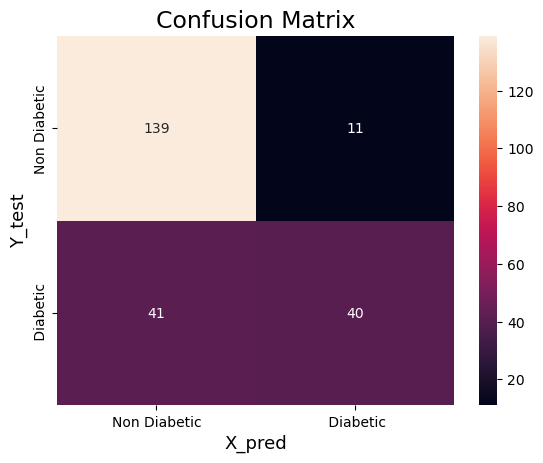

In [39]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Non Diabetic',' Diabetic'],
            yticklabels=['Non Diabetic',' Diabetic'])
plt.ylabel('Y_test',fontsize=13)
plt.xlabel('X_pred',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Predictive System

In [15]:
custom_input = (5,166,72,19,175,25.8,0.587,51)
input = np.asarray(custom_input)
input = input.reshape(1,-1)

pred = model.predict(input)
print(pred)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Saving the model

In [16]:
import pickle

filename = 'diabetes_pred_model.sav'
pickle.dump(model, open(filename, 'wb'))